In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [2]:
sns.set()
sns.set_palette(palette='deep')
import folium                 # for Displaying map of Berlin City
from folium.plugins import FastMarkerCluster

In [3]:
listings= pd.read_csv('listings_summary.csv')
listings.head()

,id,scrape_id,last_scraped,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,...,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,2.018110e+13,43411,none,2217,Ian,18-08-2008,"Key Biscayne, Florida, United States",within an hour,0.96,...,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,2.018110e+13,43411,none,2986,Michael,16-09-2008,"Berlin, Berlin, Germany",NaN,NaN,...,10.0,t,NaN,f,f,flexible,f,f,1,1.42
2,3176,2.018110e+13,43411,none,3718,Britta,19-10-2008,"Coledale, New South Wales, Australia",within a day,1.00,...,9.0,t,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,2.018110e+13,43411,none,4108,Jana,07-11-2008,"Berlin, Berlin, Germany",NaN,NaN,...,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,2.018110e+13,43411,none,17391,Bright,16-05-2009,"Berlin, Berlin, Germany",within an hour,1.00,...,9.0,t,NaN,f,f,moderate,f,f,1,1.75


In [4]:
pd.options.display.max_columns = None # to display all columns 
listings.head() 

,id,scrape_id,last_scraped,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,2.018110e+13,43411,none,2217,Ian,18-08-2008,"Key Biscayne, Florida, United States",within an hour,0.96,NaN,t,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,43411,118,42471.0,43401.0,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,2.018110e+13,43411,none,2986,Michael,16-09-2008,"Berlin, Berlin, Germany",NaN,NaN,NaN,f,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,43411,6,43285.0,43374.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,f,f,flexible,f,f,1,1.42
2,3176,2.018110e+13,43411,none,3718,Britta,19-10-2008,"Coledale, New South Wales, Australia",within a day,1.00,NaN,f,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow,Berlin,Berlin,10405,Berlin,"Berlin, Germany",DE,Germany,52.534996,13.417579,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$520.00,"$1,900.00",$200.00,$50.00,2,$20.00,62,1125,a week ago,t,0,0,0,220,43411,143,39984.0,42814.0,92.0,9.0,9.0,9.0,9.0,10.0,9.0,t,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,2.018110e+13,43411,none,4108,Jana,07-11-2008,"Berlin, Berlin, Germany",NaN,NaN,NaN,f,Schöneberg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Schöneberg,Schöneberg-Nord,Tempelhof - Schöneberg,Berlin,Berlin,10777,Berlin,"Berlin, Germany",DE,Germany,52.498855,13.349065,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",0.0,$26.00,$175.00,$599.00,$250.00,$30.00,1,$18.00,5,360,4 weeks ago,t,0,0,22,297,43411,25,41498.0,43328.0,88.0,9.0,9.0,9.0,10.0,9.0,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,2.018110e+13,43411,none,17391,Bright,16-05-2009,"Berlin, Berlin, Germany",within an hour,1.00,NaN,t,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Helmholtzplatz,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.543157,13.415091,t,Apartment,Private ro

In [5]:
# Checking the shape of the data: Number of columns and rows

listings.shape

(22552, 76)

In [6]:
## As the data set pertains to Berlin, some of the features have values for Berlin/Germany and hence such features will not show any
## variance from modeling perspective and hence the same should be dropped.. As an example let's look at the values in smart_location feature.
listings["smart_location"].value_counts()

Berlin, Germany                                22419
., Germany                                        12
Berlin , Germany                                  12
Schöneberg, Germany                               11
Mitte, Germany                                     8
                                               ...  
Baseler Straße 91 A, 12205 Berlin , Germany        1
Wannsee, Germany                                   1
Berlin, Schöneberg, Germany                        1
Berlin-Wedding, Germany                            1
柏林, Germany                                        1
Name: smart_location, Length: 61, dtype: int64

In [7]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 76 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   scrape_id                         22552 non-null  float64
 2   last_scraped                      22552 non-null  int64  
 3   experiences_offered               22552 non-null  object 
 4   host_id                           22552 non-null  int64  
 5   host_name                         22526 non-null  object 
 6   host_since                        22526 non-null  object 
 7   host_location                     22436 non-null  object 
 8   host_response_time                9658 non-null   object 
 9   host_response_rate                9657 non-null   float64
 10  host_acceptance_rate              0 non-null      float64
 11  host_is_superhost                 22526 non-null  object 
 12  host

In [8]:
### Examine missing values
listings_na = listings.isna().sum()
listings_na[listings_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

host_acceptance_rate           22552
jurisdiction_names             22552
square_feet                    22106
monthly_price                  19893
weekly_price                   18871
host_response_rate             12895
host_response_time             12894
security_deposit                9361
cleaning_fee                    7146
host_neighbourhood              5094
review_scores_value             4435
review_scores_checkin           4432
review_scores_location          4431
review_scores_communication     4418
review_scores_accuracy          4414
review_scores_cleanliness       4411
review_scores_rating            4389
first_review                    3914
reviews_per_month               3914
last_review                     3908
neighbourhood                   1131
zipcode                          656
host_location                    116
state                             84
market                            63
beds                              40
bathrooms                         32
h

In [9]:
listings.drop(['jurisdiction_names', 'host_acceptance_rate','square_feet','monthly_price','weekly_price' ,'host_response_rate','host_response_time' ,'security_deposit'],axis='columns', inplace=True)       

In [10]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 68 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   scrape_id                         22552 non-null  float64
 2   last_scraped                      22552 non-null  int64  
 3   experiences_offered               22552 non-null  object 
 4   host_id                           22552 non-null  int64  
 5   host_name                         22526 non-null  object 
 6   host_since                        22526 non-null  object 
 7   host_location                     22436 non-null  object 
 8   host_is_superhost                 22526 non-null  object 
 9   host_neighbourhood                17458 non-null  object 
 10  host_listings_count               22526 non-null  float64
 11  host_total_listings_count         22526 non-null  float64
 12  host

In [11]:
### Let's examine the target column which is price

listings.describe(include="all")["price"]

count      22552
unique       295
top       $30.00
freq        1387
mean         NaN
std          NaN
min          NaN
25%          NaN
50%          NaN
75%          NaN
max          NaN
Name: price, dtype: object

In [12]:
listings.price.unique()

array(['$60.00', '$17.00', '$90.00', '$26.00', '$42.00', '$180.00',
       '$70.00', '$120.00', '$45.00', '$49.00', '$129.00', '$98.00',
       '$160.00', '$65.00', '$197.00', '$130.00', '$100.00', '$44.00',
       '$62.00', '$55.00', '$40.00', '$25.00', '$52.00', '$39.00',
       '$80.00', '$50.00', '$43.00', '$36.00', '$119.00', '$56.00',
       '$48.00', '$88.00', '$200.00', '$37.00', '$102.00', '$29.00',
       '$84.00', '$69.00', '$185.00', '$155.00', '$66.00', '$53.00',
       '$92.00', '$75.00', '$114.00', '$506.00', '$82.00', '$68.00',
       '$125.00', '$89.00', '$59.00', '$96.00', '$31.00', '$81.00',
       '$161.00', '$30.00', '$23.00', '$35.00', '$76.00', '$46.00',
       '$296.00', '$244.00', '$20.00', '$170.00', '$64.00', '$375.00',
       '$32.00', '$86.00', '$79.00', '$38.00', '$74.00', '$195.00',
       '$150.00', '$165.00', '$51.00', '$110.00', '$95.00', '$28.00',
       '$85.00', '$58.00', '$63.00', '$175.00', '$19.00', '$91.00',
       '$93.00', '$72.00', '$33.00', 

In [13]:
listings["price"] = listings["price"].apply(lambda x: x.replace("$", "")) # Remove dollar sign
listings["price"] = listings["price"].apply(lambda x: x.replace(",", "")) # Remove thousand separator
listings["price"] = listings["price"].astype("float") # Cast the column into type float
listings.describe()["price"]

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

In [25]:
listings["price"].value_counts().sort_index()

8.0       4
9.0      22
10.0     26
11.0      8
12.0     24
         ..
262.0     1
263.0     1
265.0     2
268.0     1
269.0     2
Name: price, Length: 214, dtype: int64

In [27]:
#Let's look at the distribution of price at different percentiles
print("0.5% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 0.5)))
print("  1% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 1)))
print("  5% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 5)))
print(" 10% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 10)))
print(" 90% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 90)))
print(" 95% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 95)))
print(" 99% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 99)))
print("99.5% properties have a price lower than {0: .2f}".format(np.percentile(listings["price"], 99.5)))

0.5% properties have a price lower than  13.00
  1% properties have a price lower than  15.00
  5% properties have a price lower than  20.00
 10% properties have a price lower than  24.00
 90% properties have a price lower than  100.00
 95% properties have a price lower than  129.30
 99% properties have a price lower than  200.00
99.5% properties have a price lower than  235.00


In [28]:
## We are interested in building a model to correctly predict the listing price which are greater than 0 and less
## than 270

listings = listings[(listings.price > 1 ) & (listings.price < 270 )] 

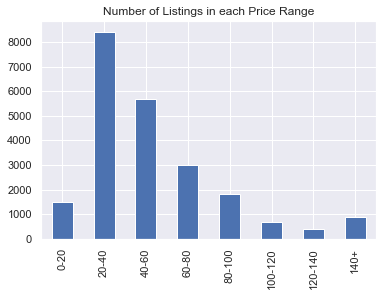

In [29]:
## Let's create a range variable to understand how many records we have in different slabs

price_range = pd.cut(listings["price"], 
                     bins=[0, 20, 40, 60, 80, 100, 120, 140, listings["price"].max()], 
                     labels=["0-20", "20-40", "40-60", "60-80", "80-100", "100-120", "120-140", "140+"])
listings["price_range"] = price_range 
listings["price_range"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Listings in each Price Range")
plt.show()

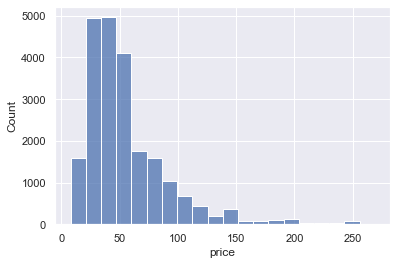

In [30]:
sns.histplot(listings['price'],bins=20);

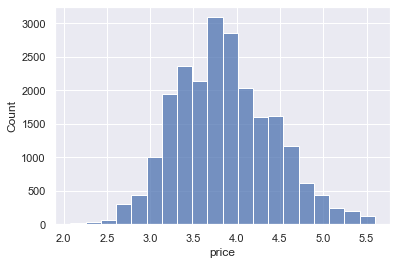

In [31]:
sns.histplot(np.log(listings["price"]),bins=20);

In [32]:
## This is a custom column that we created to visualize the Price variable in discrete format.

listings.drop(['price_range'], axis='columns', inplace=True)

In [33]:
## Let's look at one more variable related to price- cleaning fee

# replace missing values with zero and convert cleaning_fee column into numeric value
listings.cleaning_fee.fillna('$0.00', inplace=True)
listings.cleaning_fee = listings.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float).astype(int)
listings.cleaning_fee.isna().sum()

C:\Users\ashut\AppData\Local\Temp\ipykernel_24452\2713852695.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings.cleaning_fee = listings.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float).astype(int)


0

In [34]:
## is there are correlation between price and cleaning_fee
np.corrcoef(listings.cleaning_fee,listings.price)## Correlation is not high

array([[1.        , 0.40280616],
       [0.40280616, 1.        ]])

In [35]:
### Is demand dependent on if a host is a superhost

# check super host column for NaN's
listings.host_is_superhost.isna().sum()

25

In [36]:
listings['host_is_superhost'].value_counts(1)

f    0.867384
t    0.132616
Name: host_is_superhost, dtype: float64

In [37]:
# replace NaN's with value 'false' for not being a superhost
listings.host_is_superhost.fillna(value='f', inplace=True)
listings.host_is_superhost.isna().sum()

0

In [38]:
listings['host_is_superhost'].value_counts(1)

f    0.867533
t    0.132467
Name: host_is_superhost, dtype: float64

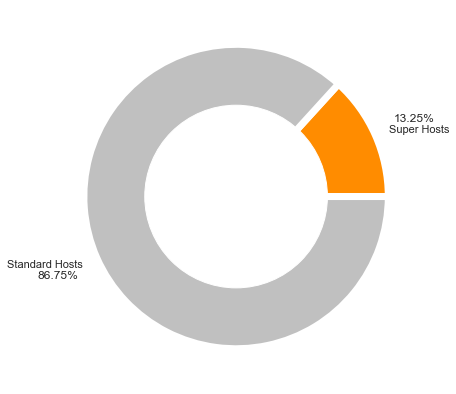

In [39]:
super_host    = listings.host_is_superhost.value_counts()['t']
no_super_host = listings.host_is_superhost.value_counts()['f']
names = ['Super Hosts','Standard Hosts']
size  = [super_host, no_super_host]
# create a pie chart
plt.pie(size, labels=names, colors=['darkorange','silver'], 
        autopct='%.2f%%', pctdistance=1.28,
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

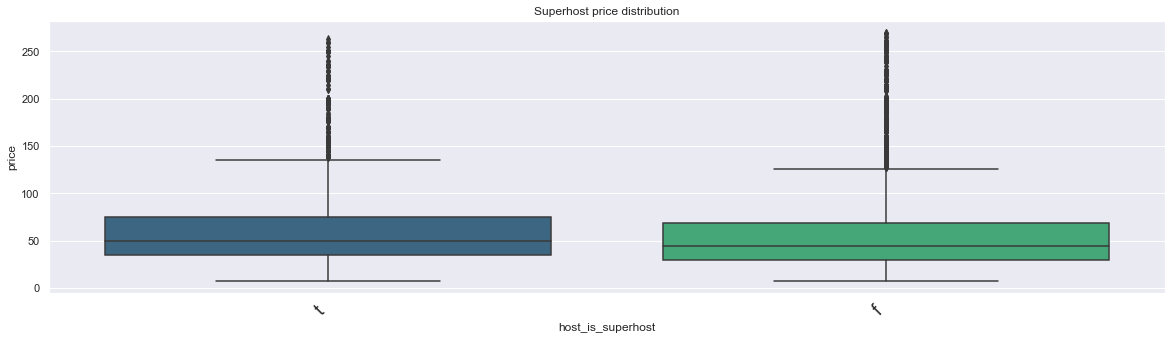

In [40]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="host_is_superhost", y="price", data=listings, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Superhost price distribution')
chart;

In [47]:
## Let's study Latitude and Longitue features 

lat = listings['latitude'].tolist()
lon = listings['longitude'].tolist()
locations = list(zip(lat, lon))

# 52.5200° N, 13.4050° E is the latitude and longitude of berlin

map1 = folium.Map(location=[52.5200, 13.4050], zoom_start=12)
FastMarkerCluster(locations).add_to(map1)
map1

In [48]:
from math import sin, cos, sqrt, atan2, radians
def distance(lat1, lat2, lon1, lon2):
    R = 6373.0 ## Approx radius of earth in KM
    rlat1 = radians(lat1)
    rlat2 = radians(lat2)
    rlon1 = radians(lon1)
    rlon2 = radians(lon2)
    rdlon = rlon2 - rlon1
    rdlat = rlat2 - rlat1
    a = sin(rdlat / 2)**2 + cos(rlat1) * cos(rlat2) * sin(rdlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

In [58]:
# Top locations in Berlin
toploc = {"hbf": [52.525293, 13.369359], 
          "txl": [52.558794, 13.288437], 
          "btor": [52.516497, 13.377683], 
          "museum": [52.517693, 13.402141], 
          "reichstag": [52.518770, 13.376166]}
toploc = pd.DataFrame.from_dict(toploc)
# print(toploc)
toploc_trans = toploc.transpose()
toploc_trans.columns = ["latitude", "longitude"]
# print(toploc_trans)
# toploc_trans.info()

# Construct distance columns
dist = []
for col in toploc.columns:
    listings["dist_"+col] = listings.apply(lambda x: distance(x.latitude, toploc[col][0], x.longitude, toploc[col][1]), axis=1)
    dist.append("dist_"+col)


In [59]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22315 entries, 0 to 22551
Data columns (total 73 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22315 non-null  int64  
 1   scrape_id                         22315 non-null  float64
 2   last_scraped                      22315 non-null  int64  
 3   experiences_offered               22315 non-null  object 
 4   host_id                           22315 non-null  int64  
 5   host_name                         22290 non-null  object 
 6   host_since                        22290 non-null  object 
 7   host_location                     22201 non-null  object 
 8   host_is_superhost                 22315 non-null  object 
 9   host_neighbourhood                17280 non-null  object 
 10  host_listings_count               22290 non-null  float64
 11  host_total_listings_count         22290 non-null  float64
 12  host

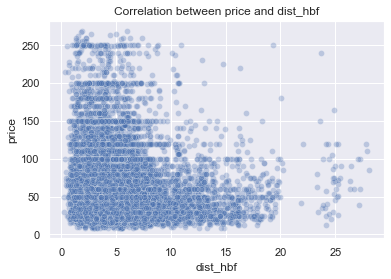

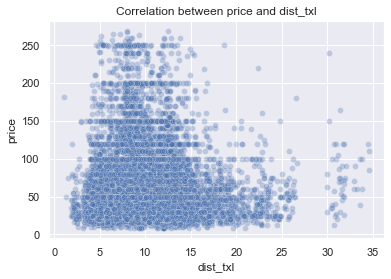

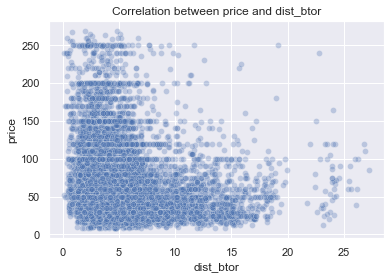

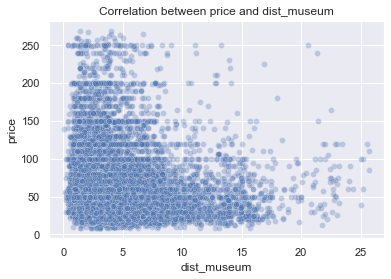

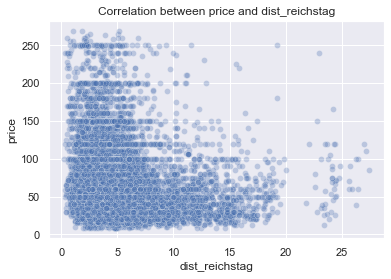

In [62]:
from scipy import stats
for distance in dist:
    sns.scatterplot(x=distance, y="price", data=listings, alpha=0.3)
    plt.title("Correlation between price and "+distance)
    plt.show()

In [63]:
## As similar scatter plot was observed for all distance variables, let's take an average and create a new variable

listings['dist_average'] = listings[['dist_hbf', 'dist_txl', 'dist_btor', 'dist_museum', 'dist_reichstag']].mean(axis=1) 


In [64]:
listings[['dist_hbf', 'dist_txl', 'dist_btor', 'dist_museum', 'dist_reichstag','dist_average']].head()

,dist_hbf,dist_txl,dist_btor,dist_museum,dist_reichstag,dist_average
0,2.470531,8.177076,2.619164,1.873802,2.503054,3.528725
1,3.512827,7.935716,3.998364,3.431962,3.825405,4.540855
2,3.436703,9.127423,3.394579,2.189884,3.333330,4.296384
3,3.245779,7.828150,2.757640,4.159571,2.876309,4.173490
4,3.677298,8.740897,3.898852,2.964838,3.780919,4.612561


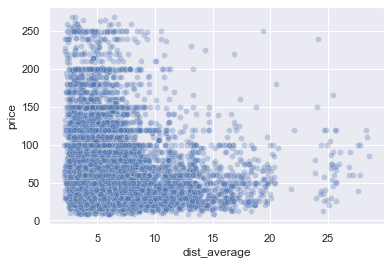

In [65]:
sns.scatterplot(x='dist_average', y="price", data=listings, alpha=0.3);

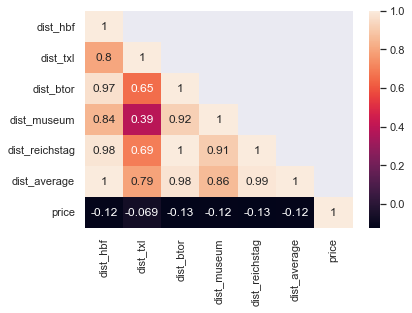

In [68]:
sns.heatmap(listings[['dist_hbf','dist_txl','dist_btor','dist_museum','dist_reichstag','dist_average','price']].corr(),
            annot=True, mask=np.triu(listings[['dist_hbf','dist_txl','dist_btor','dist_museum','dist_reichstag','dist_average','price']].corr(),+1));

In [69]:
listings['amenities'].unique()

array(['{TV,"Cable TV",Wifi,Kitchen,Gym,Heating,"Family/kid friendly","Smoke detector",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Private living room",Bathtub,"Hot water","Bed linens","Extra pillows and blankets",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Cooking basics",Stove,"Luggage dropoff allowed","Long term stays allowed"}',
       '{Wifi,Kitchen,Elevator,Heating,Washer,Essentials,Shampoo,"Hair dryer","Laptop friendly workspace","Private living room"}',
       '{Internet,Wifi,Kitchen,"Buzzer/wireless intercom",Heating,"Family/kid friendly",Washer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace"}',
       ...,
       '{Wifi,Kitchen,Heating,Washer,"Fire extinguisher",Essentials,Iron,"Hot water"}',
       '{Wifi,"Paid parking off premises",Doorman,Elevator,Heating,

In [70]:
## Let's identify 10 most frequently occuring amenities in the dataset
from collections import Counter
amenities = Counter()
listings['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(amenities.update)

amenities.most_common(10)

[('Wifi', 21295),
 ('Kitchen', 21135),
 ('Heating', 20993),
 ('Essentials', 20116),
 ('Washer', 18330),
 ('Hair dryer', 14708),
 ('Laptop friendly workspace', 14296),
 ('Hangers', 13728),
 ('Iron', 11042),
 ('Shampoo', 10500)]

In [71]:
listings['Laptop_friendly_workspace'] = listings['amenities'].str.contains('Laptop friendly workspace')
listings['TV'] = listings['amenities'].str.contains('TV')
listings['Hot water']=listings['amenities'].str.contains('Hot water')
listings['Family_friendly'] = listings['amenities'].str.contains('Family/kid friendly')
listings['Hair_dryer'] = listings['amenities'].str.contains('Hair_dryer')
listings['Smoking_allowed'] = listings['amenities'].str.contains('Smoking allowed')

In [72]:
### Let's look at the feature list now
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22315 entries, 0 to 22551
Data columns (total 80 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22315 non-null  int64  
 1   scrape_id                         22315 non-null  float64
 2   last_scraped                      22315 non-null  int64  
 3   experiences_offered               22315 non-null  object 
 4   host_id                           22315 non-null  int64  
 5   host_name                         22290 non-null  object 
 6   host_since                        22290 non-null  object 
 7   host_location                     22201 non-null  object 
 8   host_is_superhost                 22315 non-null  object 
 9   host_neighbourhood                17280 non-null  object 
 10  host_listings_count               22290 non-null  float64
 11  host_total_listings_count         22290 non-null  float64
 12  host

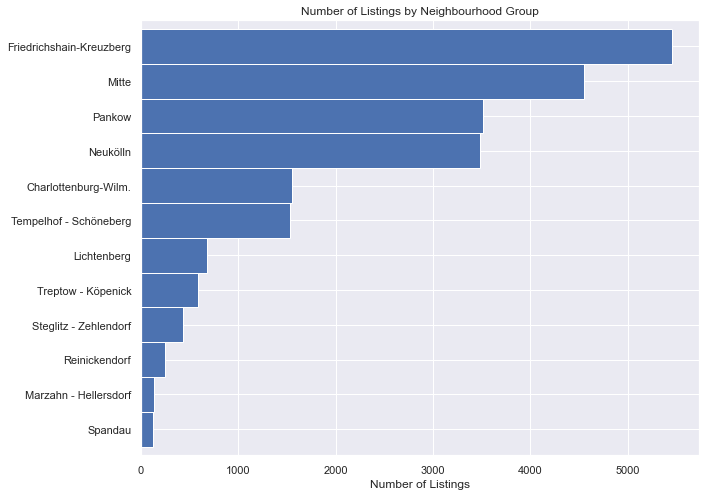

In [73]:
freq = listings['neighbourhood_group_cleansed'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1)
plt.title("Number of Listings by Neighbourhood Group")
plt.xlabel('Number of Listings')
plt.show()

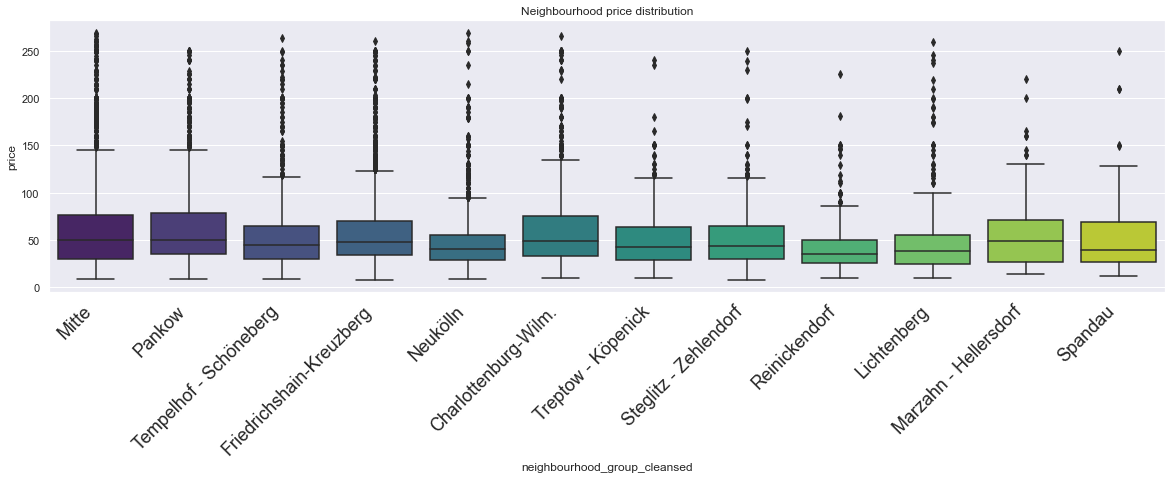

In [74]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="neighbourhood_group_cleansed", y="price", data=listings, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Neighbourhood price distribution')
chart;

1.0    17087
2.0     2926
0.0     1471
3.0      666
4.0      120
5.0       18
6.0        5
8.0        2
7.0        1
9.0        1
Name: bedrooms, dtype: int64 



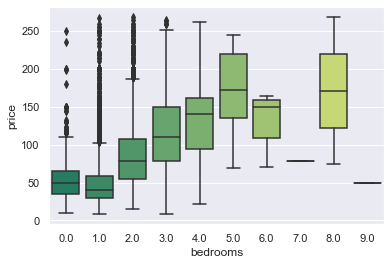

In [75]:
## Let us see the number of bedrooms of each property
print(listings['bedrooms'].value_counts(),'\n')


## How is the distribution of bedrooms with price.. Ideally if number of bedrooms are high, price would be high.
sns.boxplot(x="bedrooms", y="price", data=listings,palette="summer");

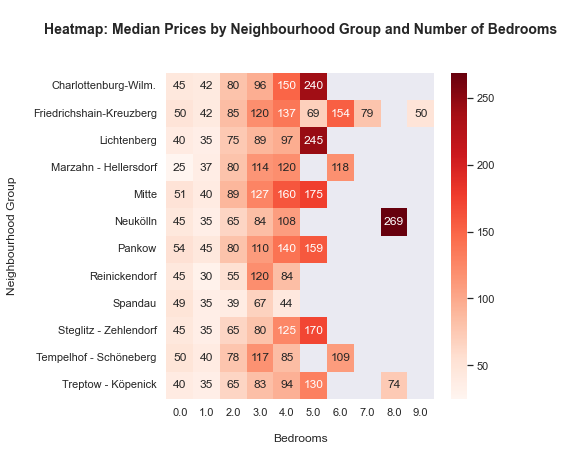

In [76]:
plt.figure(figsize=(6,6))
sns.heatmap(listings.groupby(['neighbourhood_group_cleansed', 'bedrooms']).price.median().unstack(), 
            cmap='Reds', annot=True, fmt=".0f")

plt.xlabel('\nBedrooms', fontsize=12)
plt.ylabel('Neighbourhood Group\n', fontsize=12)
plt.title('\nHeatmap: Median Prices by Neighbourhood Group and Number of Bedrooms\n\n', fontsize=14, fontweight='bold');